# Plot NSE CDFs

Notebook 5/X

This just so happens to be the _second_ time I've written this notebook because _GitHub_ ate the first one (it definitely cannot be attributed to me in any way and I absolutely cannot think of (minimum) three reasons why it even _could_ be my fault).

So far we have 1) created climate nonstationarity configuration files, 2) created sister job scripts for SAC-SMA, sent off those models, 3) ensembled and analyzed the results, and 4) performed more in-depth analyses between two models.

Finally, we can plot metric CDFs for ALL of our experiments.

### Import Libraries

In [1]:
# standard modules
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
from pathlib import Path, PosixPath
from matplotlib.transforms import offset_copy

##### Notebook Configuration

Here we can define which metric we would like to plot in the CDFs. I will use the Nash-Sutcliffe Efficiency (NSE) Coefficient, which is most commonly used to vizualize hydrological model performance, but any metrics calculated in notebook 3/X can be used.

In [25]:
#########################################################################################

#Define if plots are inline or interactive
interactive_plots = True

#########################################################################################

##### Paths

In [3]:
#########################################################################################

#Path to working directory (current directory)
working_dir = Path(os.getcwd())

#Path to notebook_env_saves directory (.../notebook_env_saves)
env_saves_dir = working_dir / 'notebook_env_saves'

#########################################################################################

**You should not have to edit anything below this cell.**

The cell below orients the notebook based on the parameters specifed above.

In [26]:
#########################################################################################

#Define metric CDF to plot
metric = 'nse'

#########################################################################################

#Make plots interactive or inline according to value of interactive_plots variable
if interactive_plots:
    %matplotlib notebook
    %matplotlib notebook
else:
    %matplotlib inline
    
#########################################################################################

### Load Source Data

In [5]:
#Retreive list of cdfs files avaliable in env_saves_dir
cdfs_list = [x for x in os.listdir(env_saves_dir) if x.startswith('cdf')]

In [6]:
#Initiate dictionary to store all loaded cdfs files
cdfs = {}

#For every file in cdfs_list...
for cdf in cdfs_list:
    
    #Define path to the file
    path = env_saves_dir / cdf
    
    #Get name from file name
    name = cdf.split('cdfs_')[1].split('.')[0]
    
    #Open path...
    with open(path,'rb') as f:
        
        #...and load
        cdfs[name] = pkl.load(f)

### Plot CDFs

 ##### Extreme vs. Random Train/Test Splits

First we will to create a 2x2 grid of CDF plots for a defined metric for the possible model/forcing pairs. In this case, NeuralHydrology/SAC-SMA and Daymet/NLDAS. Note that I only plot static NeuralHydrology experiments for this figure and that, although SAC-SMA is saved as 'dynamic' for structure consistency, SAC-SMA cannot accept external static or dynamic values.

<IPython.core.display.Javascript object>


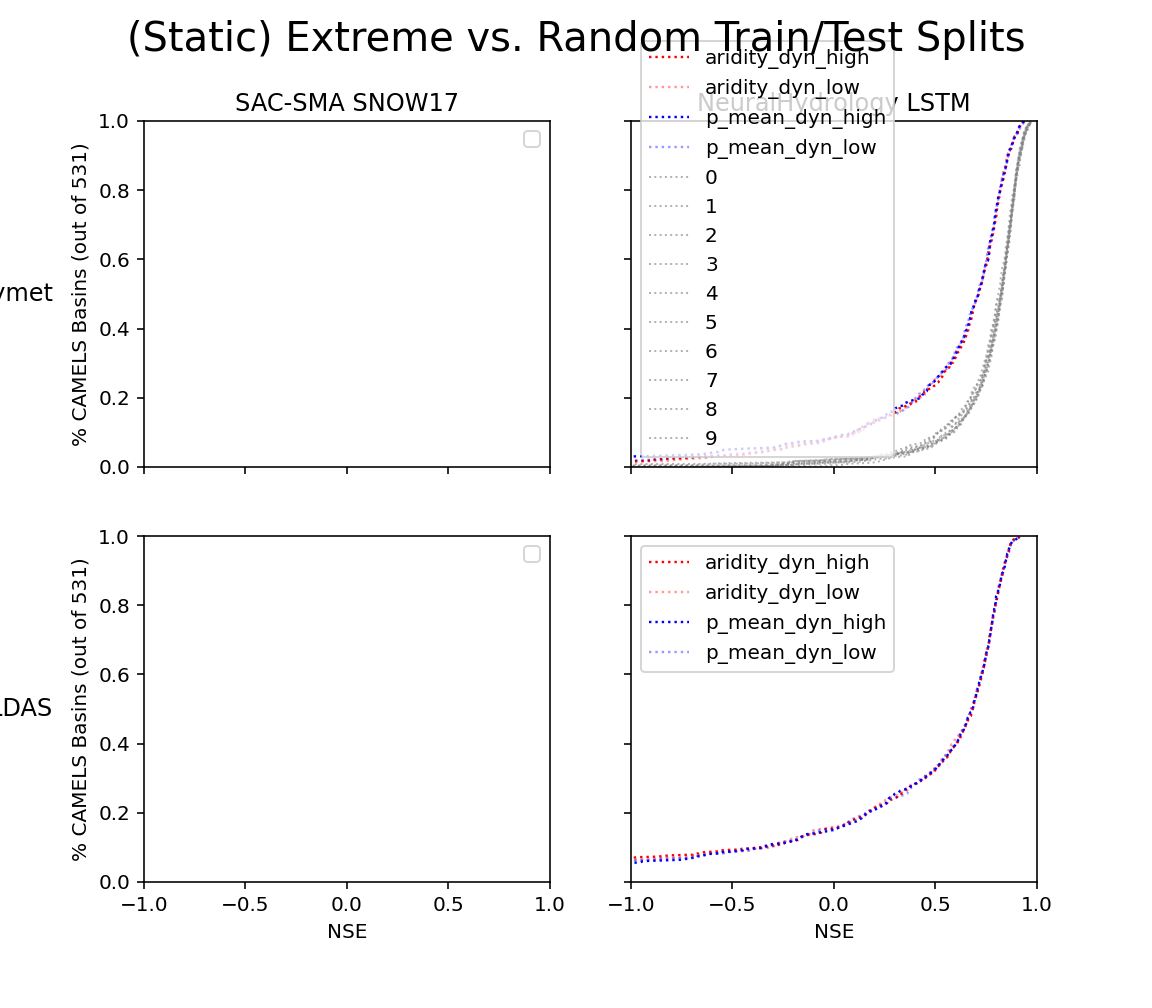

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [35]:
#Define columns and rows of plots
cols = ['SAC-SMA SNOW17','NeuralHydrology LSTM']
rows = ['Daymet','NLDAS']

#Create list(s) of subplot coordinates
#Row
ns = [0,0,1,1]
#Column
ms = [0,1,0,1]

#List of models (one for each plot)
models = ['sacsma','nh','sacsma','nh']
#List of forcings (one for each plot)
forcings = ['daymet','daymet','nldas_extended','nldas_extended']

#List train/test split types
exp_types = ['extreme','random']
year = 'all'
    
#Create a 2x2 grid of plots (one plot for each model/forcing pair)
fig, axs = plt.subplots(2,2,figsize = (8,7))
#Set subplot labels (NOTICE THAT NSE IS HARDCODED HERE)
plt.setp(axs.flat, xlabel='NSE', ylabel='% CAMELS Basins (out of 531)')
#Define a pad distance between texts
pad = 5 # in points

#For every column...
for ax, col in zip(axs[0], cols):
    
    #Create an annotation to signify which model
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

#For every row...
for ax, row in zip(axs[:,0], rows):
    
    #Create an annotation to signify which forcing
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

#For a given position (n,m) where a model/forcing pair is to be plot...
for n,m,model,forcing in zip(ns,ms,models,forcings):

    #Default input to static (as we only want to plot static)
    inp = 'static'

    #But if the model is sacsma...
    if model == 'sacsma':
        
        #Set input to dynamic
        inp = 'dynamic'

    #For every train/test split type...
    for exp_type in exp_types:

        #Define a name with the current iterators
        name = f'{model}_{inp}_{exp_type}_{forcing}_{year}'

        #And if that name is in the cdfs dictionary...
        if name in cdfs.keys():

            #Go into that dictionary and retrieve experiment names
            experiments = cdfs[name].keys()

            #Set r to 0 (keeps count of how many random cdf lines we plot...
            #...so we don't have 500 "random"s on the legend)
            r = 0

            #For every experiment...
            for experiment in experiments:

                #Retrieve x and y values from cdfs dictionary
                x = cdfs[name][experiment][metric]['x']
                y = cdfs[name][experiment][metric]['y']

                #Default color, transparency, line width, and line type
                c = 'r'
                alpha = 1
                lw = 1.2
                l = ':'

                #If we are plotting p_mean...
                if 'p' in experiment:

                    #Make the line blue
                    c = 'blue'

                #If it was a 'low' experiment...
                if 'low' in experiment:

                    #Decrease the alpha to make it a lighter color
                    alpha = 0.4

                #If sacsma model...
                if 'sacsma' in name:

                    #Make the line dash-dot and line width 1
                    l = '--'
                    lw = 1

                #If random experiment...
                if 'random' in name:

                    #Add 1 to r variable, make line grey, line width 1, and decrease alpha
                    r = r + 1
                    c = 'grey'
                    lw = 1
                    alpha = 0.6

                    #If sacsma model...
                    if 'sacsma' in name:

                        #Decrease line width
                        lw = 0.7

                    #If are isn't 1, then set label to None
                    if r != 1:
                        label = None

                #Plot x,y with the defined line type/color,width, alpha, and label 
                axs[n,m].plot(x,y,l,c=c,alpha=alpha,lw=lw,label=experiment) #add label
                
        axs[n,m].legend()
                
    #Set axes limits
    axs[n,m].set_xlim(left=-1, right=1)
    axs[n,m].set_ylim(bottom=0, top=1)
    plt.grid()

#Only show labels for outter plots
for ax in axs.flat:
    ax.label_outer()   

#Create main figure title
fig.suptitle(f'(Static) Extreme vs. Random Train/Test Splits', fontsize=20)

#Show plot
plt.show()

In [ ]:
#If plot interactive, must explicitly close
plt.close()

##### All Years vs. Only NWM Years

Next, we will to create a 2x2 grid of CDF plots for a defined metric for the possible forcing/year pairs. In this case, Daymet/NLDAS and all/nwm.

In [ ]:
#Define columns and rows of plots
cols = ['All CAMELS Years','NWM Years']
rows = ['Daymet','NLDAS']

#Create list(s) of subplot coordinates
#Row
ns = [0,0,1,1]
#Column
ms = [0,1,0,1]

#List of forcings (one for each plot)
forcings = ['daymet','daymet','nldas_extended','nldas_extended']
#List of years (one for each plot)
years = ['all','nwm','all','nwm']

#List of models
models = ['nh','sacsma']
#List of experiment types
exp_types = ['extreme','random']

    
#Create a 2x2 grid of plots (one plot for each forcing/year pair)
fig, axs = plt.subplots(2,2,figsize = (8,7))
#Set subplot labels (NOTICE THAT NSE IS HARDCODED HERE)
plt.setp(axs.flat, xlabel='NSE', ylabel='% CAMELS Basins (out of 531)')
#Define a pad distance between texts
pad = 5 # in points

#For every column...
for ax, col in zip(axs[0], cols):
    
    #Create an annotation to signify which years
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

#For every row...
for ax, row in zip(axs[:,0], rows):
    
    #Create an annotation to signify which forcing
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

#For a given position (n,m) where a forcing/year pair is to be plot...
for n,m,forcing,year in zip(ns,ms,forcings,years):
    #For each model...
    for model in models:
        #And for each experiment type...
        for exp_type in exp_types:
        
            #Default input type to static...
            inp = 'static'

            #Unless it's a sacsma model
            if model == 'sacsma':
                
                #Then it should be dynamic
                inp = 'dynamic'
            
            #Define a name with the current iterators
            name = f'{model}_{inp}_{exp_type}_{forcing}_{year}'
            
            #And if that name is in the cdfs dictionary...
            if name in cdfs.keys():

                #Go into that dictionary and retrieve experiment names
                experiments = cdfs[name].keys()
                
                #Set r to 0 (keeps count of how many random cdf lines we plot...
                #...so we don't have 500 "random"s on the legend)
                r = 0

                #For every experiment...
                for experiment in experiments:

                    #Retrieve x and y values from cdfs dictionary
                    x = cdfs[name][experiment][metric]['x']
                    y = cdfs[name][experiment][metric]['y']

                    #Default color, transparency, line width, and line type
                    c = 'r'
                    alpha = 1
                    lw = 1.2
                    l = ':'

                    #If we are plotting p_mean...
                    if 'p' in experiment:
                        
                        #Make the line blue
                        c = 'blue'

                    #If it was a 'low' experiment...
                    if 'low' in experiment:

                        #Decrease the alpha to make it a lighter color
                        alpha = 0.4

                    #If sacsma model...
                    if 'sacsma' in name:

                        #Make the line dash-dot and line width 1
                        l = '--'
                        lw = 1

                    #If random experiment...
                    if 'random' in name:

                        #Add 1 to r variable, make line grey, line width 1, and decrease alpha
                        r = r + 1
                        c = 'grey'
                        lw = 1
                        alpha = 0.6
                        
                        #If sacsma model...
                        if 'sacsma' in name:

                            #Decrease line width
                            lw = 0.7

                        #If are isn't 1, then set label to None
                        if r != 1:
                            label = None

                    #Plot x,y with the defined line type/color,width, alpha, and label 
                    axs[n,m].plot(x,y,l,c=c,alpha=alpha,lw=lw) #add label
                    
                    #Set axes limits
                    axs[n,m].set_xlim(left=-1, right=1)
                    axs[n,m].set_ylim(bottom=0, top=1)

                    #Create main figure title
                    fig.suptitle(f'Extreme vs. Random Train/Test Splits', fontsize=20)

        #Only show labels for outside plots
        for ax in axs.flat:
            ax.label_outer()   

#Show plot
plt.show()

In [ ]:
#If plot interactive, must explicitly close
plt.close()

##### Static Attributes vs. Dynamic Climate Index Inputs

Next, we will to create a 2x2 grid of CDF plots for a defined metric for the possible forcing/year pairs. In this case, Daymet/NLDAS and all/nwm. This time, however, instead of plotting SAC-SMA we are only plotting NeuralHydrology. Also, instead of only plotting static experiments, we plot both static and dynamic.

In [ ]:
#Define columns and rows of plots
cols = ['All CAMELS Years','NWM Years']
rows = ['Daymet','NLDAS']

#Create list(s) of subplot coordinates
ns = [0,0,1,1]
ms = [0,1,0,1]

#List of forcings (one for each plot)
forcings = ['daymet','daymet','nldas_extended','nldas_extended']
#List of years (one for each plot)
years = ['all','nwm','all','nwm']

#List of experiment types
exp_types = ['extreme','random']
#List of inputs
inputs = ['static','dynamic']

#Only plot neuralhydrology models
model = 'nh'

#Create a 2x2 grid of plots (one plot for each forcing/year pair)
fig, axs = plt.subplots(2,2,figsize = (8,7))

#Set subplot labels (NOTICE THAT NSE IS HARDCODED HERE)
plt.setp(axs.flat, xlabel='NSE', ylabel='% CAMELS Basins (out of 531)')
#Define a pad distance between texts
pad = 5 # in points

#For every column...
for ax, col in zip(axs[0], cols):
        
    #Create an annotation to signify which years
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

#For every row...
for ax, row in zip(axs[:,0], rows):
    
    #Create an annotation to signify which forcing
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

#For a given position (n,m) where a model/forcing pair is to be plot...
for n,m,forcing,year in zip(ns,ms,forcings,years):

    #For each input type...
    for inp in inputs:
        
        #For each experiment type...
        for exp_type in exp_types:
        
            #Define a name with the current iterators
            name = f'{model}_{inp}_{exp_type}_{forcing}_{year}'

            #And if that name is in the cdfs dictionary...
            if name in cdfs.keys():
                
                #Go into that dictionary and retrieve experiment names
                experiments = cdfs[name].keys()

                #Set r to 0 (keeps count of how many random cdf lines we plot...
                #...so we don't have 500 "random"s on the legend)
                r = 0

                #For every experiment...
                for experiment in experiments:

                    #Retrieve x and y values from cdfs dictionary
                    x = cdfs[name][experiment]['nse']['x']
                    y = cdfs[name][experiment]['nse']['y']

                    #Default color, transparency, line width, and line type
                    c = 'r'
                    alpha = 1
                    lw = 1.2
                    l = ':'

                    #If dynamic model...
                    if 'dynamic' in name:

                        #Line type is solid
                        l = '-'
                        lw = 0.9

                    #If p_mean...
                    if 'p' in experiment:

                        #Plot blue line
                        c = 'blue'

                    #If 'low' experiment...
                    if 'low' in experiment:

                        #Decrease alpha to make lighter color
                        alpha = 0.4

                    #If a random experiment...
                    if 'random' in name:

                        #Add count to r variable and make line grey
                        r = r + 1
                        c = 'grey'
                        lw = 1
                        alpha = 0.6

                        #If dynamic, make line solid
                        if 'dynamic' in name:
                            lw = 0.5
                            alpha = 0.5

                        #If are isn't 1, then set label to None
                        if r != 1:
                            label = None

                    #Plot x,y with the defined line type/color,width, alpha, and label 
                    axs[n,m].plot(x,y,l,c=c,alpha=alpha,lw=lw) #add label
                    
                    #Set axes limits
                    axs[n,m].set_xlim(left=-1, right=1)
                    axs[n,m].set_ylim(bottom=0, top=1)

                    #Create main figure title
                    fig.suptitle(f'Extreme vs. Random Train/Test Splits', fontsize=20)

        #Only show labels for outside plots
        for ax in axs.flat:
            ax.label_outer()   

#Show plot
plt.show()

In [ ]:
#If plot interactive, must explicitly close
plt.close()